# **Breast Cancer Detection**

# Import Libraries

In [131]:
# First import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [132]:
# To hide warnings
import warnings
warnings.filterwarnings('ignore')

# **Reading Dataset**

In [133]:
df=pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **Exploring Dataset**

In [134]:
df.shape

(569, 32)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [136]:
# Show columns of dataset
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [137]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

All columns are Numerical except the target column is Categorical `diagnosis`

In [138]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


# **Explore Target Column `Diagnosis`**

In [139]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [140]:
df['diagnosis'].nunique()

2

In [141]:
# Show data distribution 
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

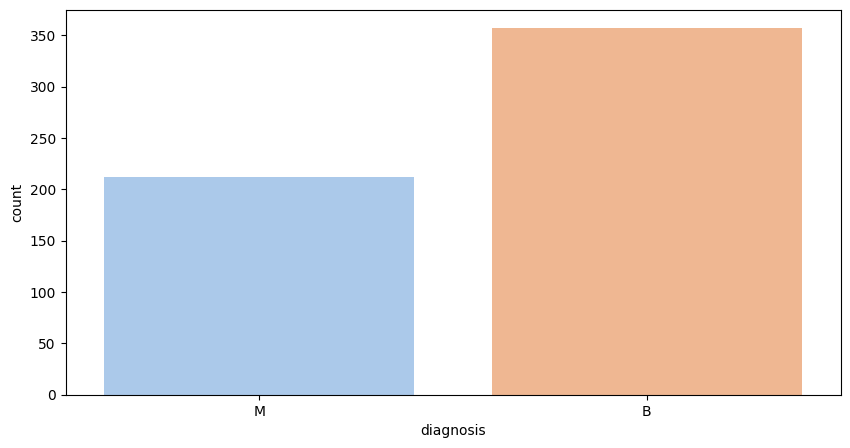

In [142]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='diagnosis',palette='pastel')
plt.show()

# **Check For Null Values**

In [143]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# **Check for Duplicated Rows**

In [144]:
df.duplicated().sum()

0

There's no null values or duplicated rows,So there's no need to handle them 

# **Data Preprocessing**

1. Remove `id` column

In [145]:
df.drop(columns='id',axis=1,inplace=True)

In [146]:
# Check that id column has been removed
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


2. Apply label encober on target column `diagnosis`

In [147]:
# First import label encoder
from sklearn.preprocessing import LabelEncoder

In [148]:
# Second Apply label encoder on diagnosis column
label_encoder=LabelEncoder()
df['diagnosis']=label_encoder.fit_transform(df['diagnosis']) # 0 --> B and 1 --> M

In [149]:
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

# **Correlation between Features**

In [150]:
cor=df.corr().T
cor

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


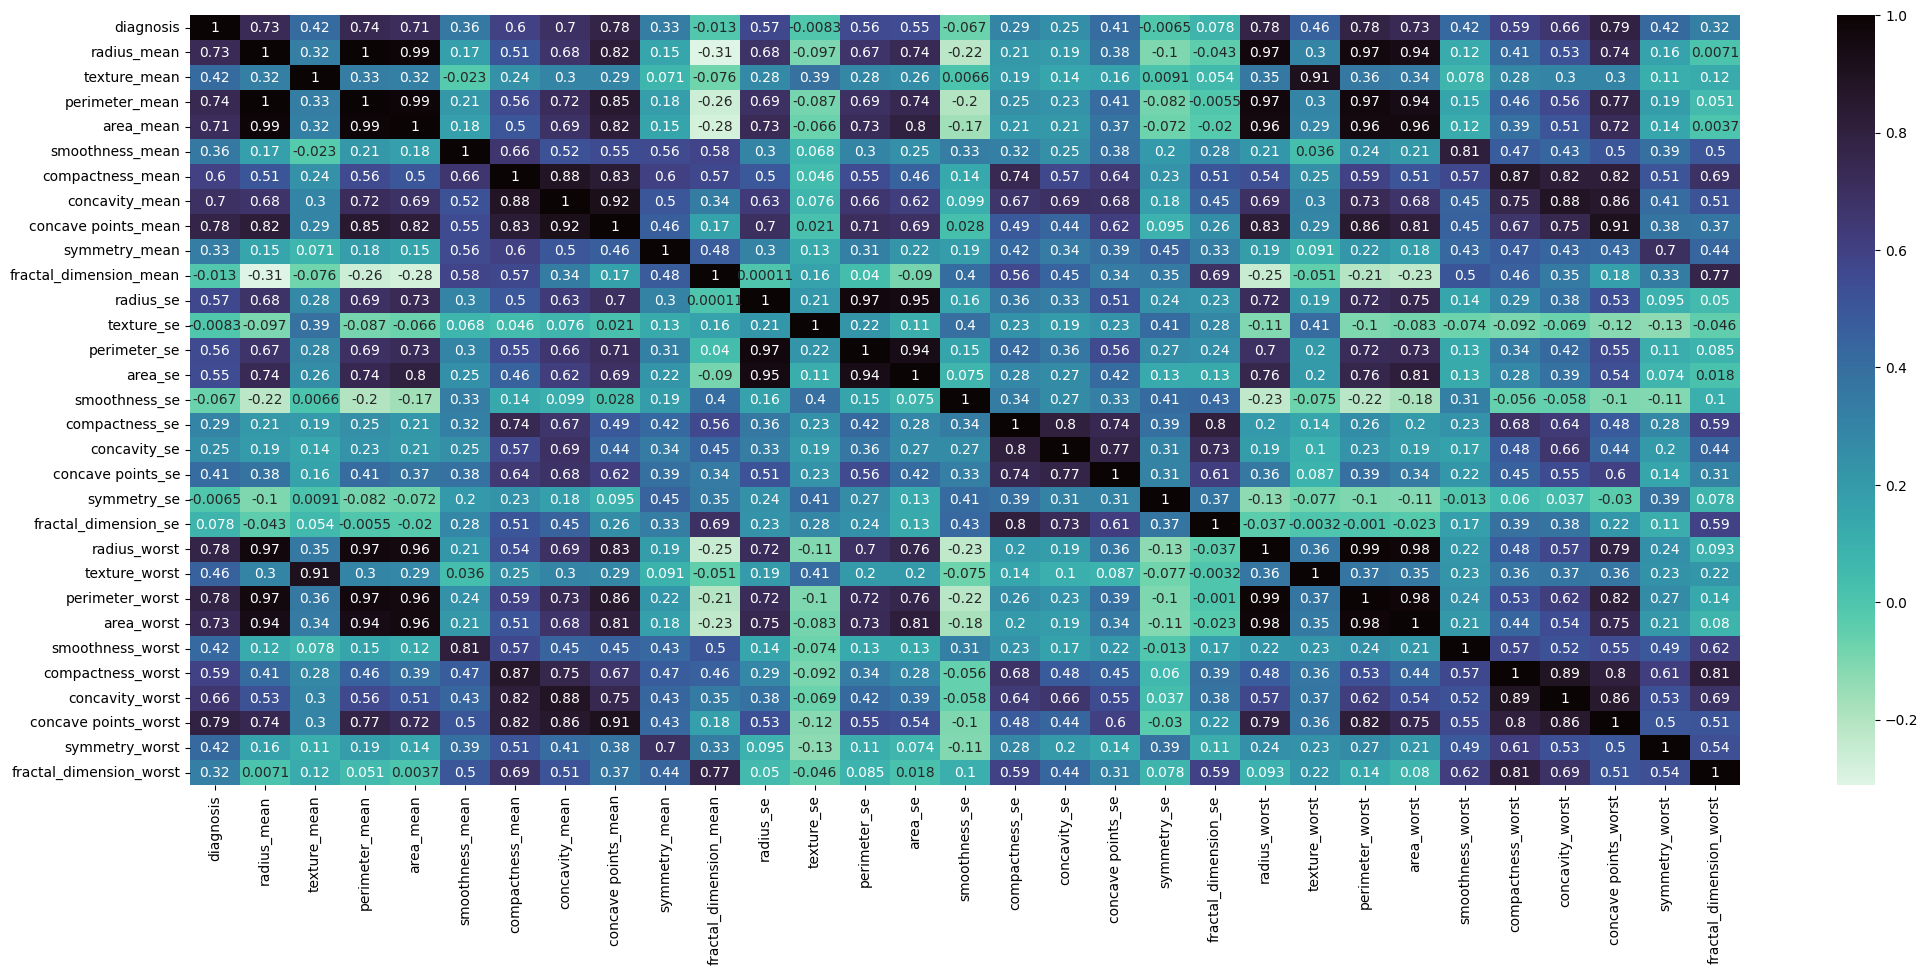

In [151]:
plt.figure(figsize=(25,10))
sns.heatmap(cor,annot=True,cmap='mako_r')
plt.show()

**Observation**:
> Almost all features are highly correlated.

# **Outlier Detection**

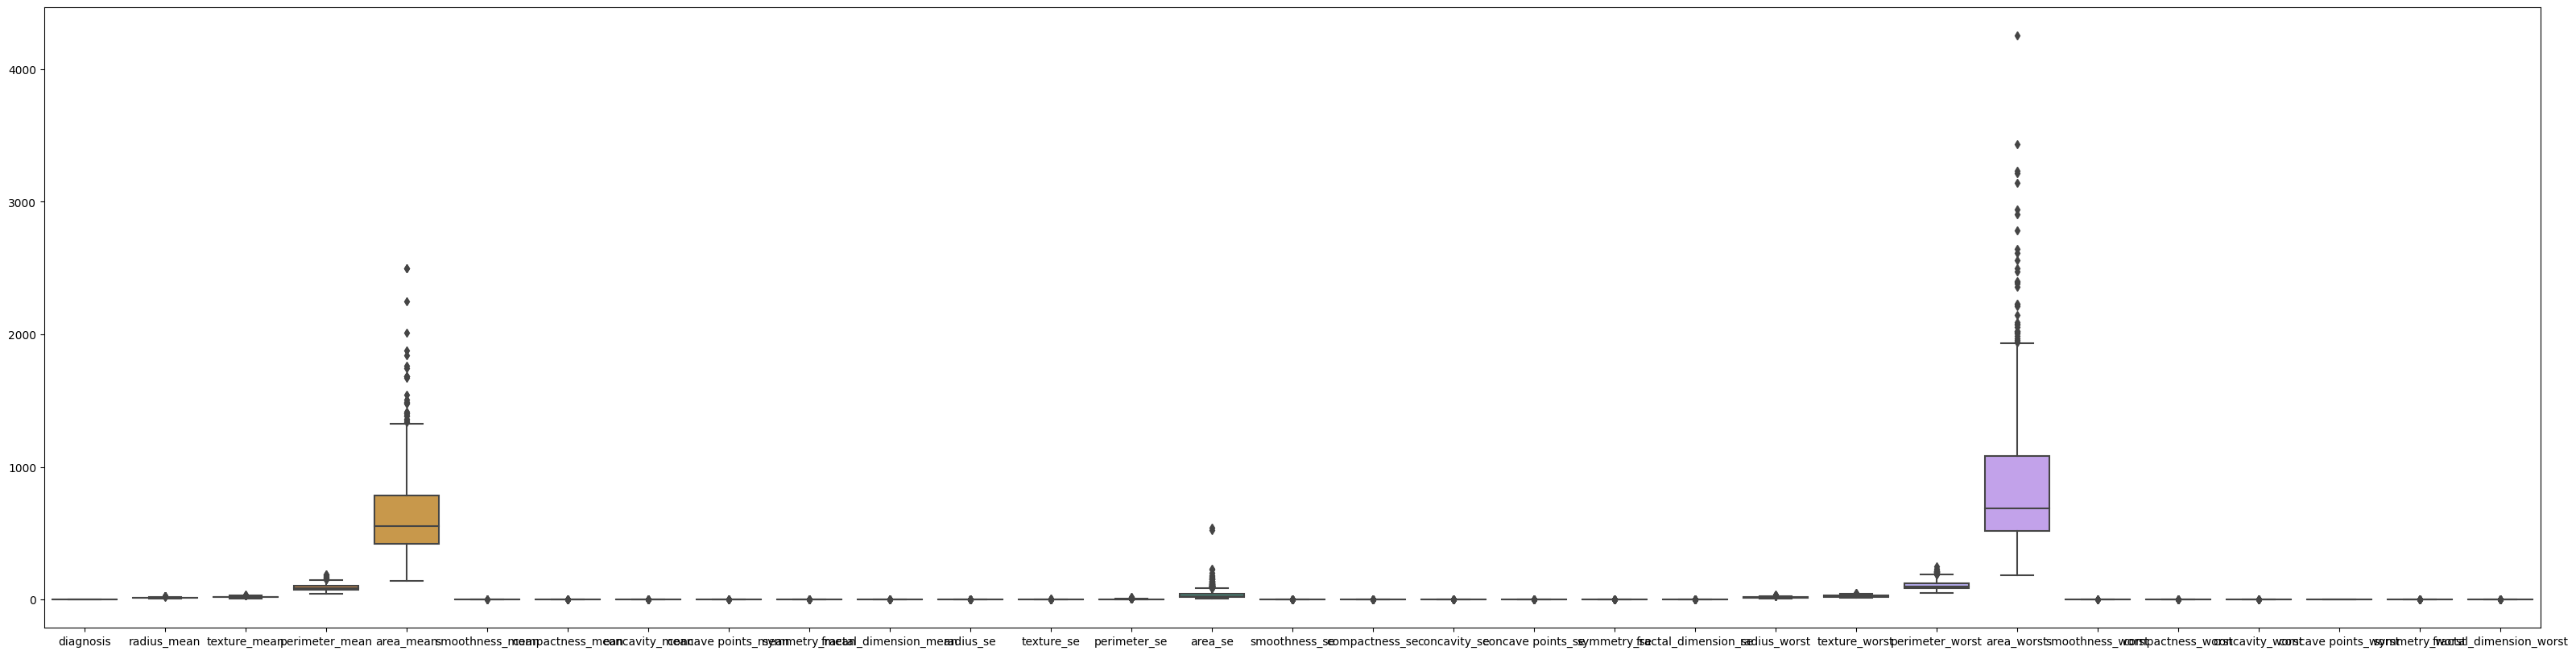

In [152]:
plt.figure(figsize=(40,10))
sns.boxplot(data=df)
plt.show()

**Observation**:
>It's shown that there are outliers in 2 columns: `area_mean`,`area_worst` 
>>So let's discover them seperately

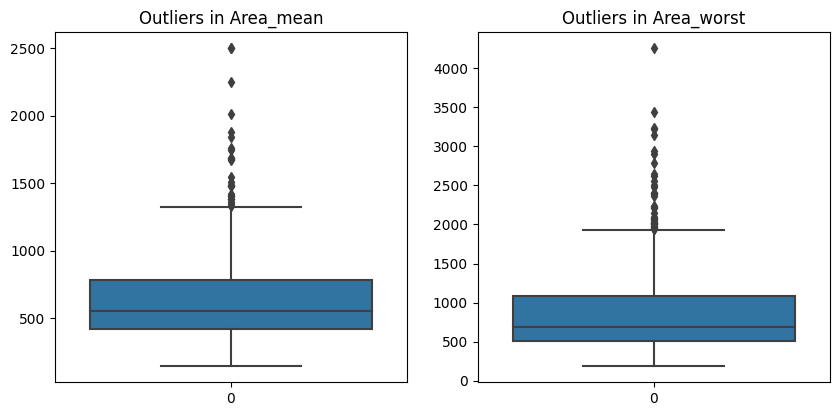

In [153]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(data=df['area_mean'])
plt.title('Outliers in Area_mean')
plt.subplot(2,2,2)
sns.boxplot(data=df['area_worst'])
plt.title('Outliers in Area_worst')
plt.show()

# **Split Data into Features and Target**

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
# Features without target column
x=df.drop(columns='diagnosis',axis=1)
x.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [156]:
# Target Column
y=df['diagnosis']
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [157]:
# Withiout any scaling
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# **Feature Engineering**

In [158]:
# import feature scaling techniques
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [159]:
scaler=StandardScaler()
mm_scaler=MinMaxScaler()
robust=RobustScaler()

**1. Standard Scaler**

In [160]:
# Values in Range (-3,3)
x_scaler=scaler.fit_transform(x)
new_df_scaler=pd.DataFrame(x_scaler,columns=x.columns)
new_df_scaler

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


**2.Min Max Scaler**

In [161]:
# Values in Range (-1,1)
xmm_scaler=mm_scaler.fit_transform(x)
new_df_mmscaler=pd.DataFrame(xmm_scaler,columns=x.columns)
new_df_mmscaler

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


**3.Robust Scaler**

In [162]:
# works weel with outliers
x_robust=robust.fit_transform(x)
new_df_robust=pd.DataFrame(x_robust,columns=x.columns)
new_df_robust

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.132353,-1.502664,1.263740,1.241446,1.190174,2.824832,2.358711,2.115850,1.855030,2.039192,...,1.801038,-0.935185,2.105595,2.343063,1.051020,2.364252,1.807750,1.715248,2.635556,1.884578
1,1.764706,-0.190053,1.612859,2.138245,-0.587956,-0.213653,0.250742,0.682995,0.059172,-0.578385,...,1.733564,-0.231481,1.480746,2.232284,-0.255102,-0.131839,0.055514,0.892194,-0.106667,0.435500
2,1.549020,0.428064,1.512617,1.798841,0.725304,1.027337,1.343287,1.758242,0.819527,-0.184086,...,1.487889,0.013889,1.328167,1.797960,0.445578,1.107869,0.833458,1.483052,1.171852,0.365664
3,-0.477941,0.273535,-0.299343,-0.455298,2.463286,2.921045,1.778327,1.335444,2.381657,4.263658,...,-0.010381,0.126157,0.029305,-0.208897,2.670068,3.410109,1.714605,1.633358,5.653333,4.508244
4,1.696078,-0.799290,1.688904,2.058223,0.234020,0.613470,1.349219,1.318681,0.050296,-0.321853,...,1.309689,-1.011574,1.320901,1.562335,0.207483,-0.035956,0.645678,0.648595,-0.678519,-0.158099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.007353,0.630551,1.927411,2.560430,0.799260,0.355376,1.803045,1.963122,-0.195266,-0.630641,...,1.813149,0.114583,1.657544,2.357130,0.329932,-0.003127,0.685544,1.261221,-1.128889,-0.431135
565,1.656863,1.671403,1.554096,1.958885,0.101955,0.164478,0.815306,1.199665,-0.118343,-0.737530,...,1.508651,1.486111,1.388714,1.836645,-0.500000,-0.102658,0.353204,0.651705,-0.370370,-0.662949
566,0.791667,1.641208,0.762530,0.847130,-0.597993,0.147679,0.306209,0.363569,-0.597633,-0.600950,...,0.693772,1.008102,0.703318,0.769298,-0.591837,0.508077,0.423249,0.434021,-0.894815,-0.089234
567,1.772059,1.863233,1.861735,1.969923,1.158479,2.815669,2.865928,2.207115,1.789941,1.023753,...,1.863322,1.621528,2.105595,1.994901,1.146259,3.419489,2.652757,1.711102,1.874074,2.131911


# **Train and Split data after Feature Scaling**

In [163]:
# With Standard Scaler
X_train_standard,X_test_standard,y_train,y_test=train_test_split(x_scaler,y,test_size=0.2,random_state=0)

In [164]:
# With Min Max Scaler
X_train_mmscaler,X_test_mmscaler,y_train,y_test=train_test_split(xmm_scaler,y,test_size=0.2,random_state=0)

In [165]:
# With Robust Scaler
X_train_robust,X_test_robust,y_train,y_test=train_test_split(x_robust,y,test_size=0.2,random_state=0)

# **Modeling Without Feature Scaling** 
# **Using: `SVC`,`Logistic Regression`,`Random Forest`**

In [166]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix

In [167]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print("Accuracy of SVC Without Scaling : ",accuracy_score(y_test,y_pred))


Accuracy of SVC Without Scaling :  0.9298245614035088


In [168]:
r=RandomForestClassifier()
r.fit(X_train,y_train)
y_pred=r.predict(X_test)
print("Accuracy of Random Forest Without Scaling : ",accuracy_score(y_test,y_pred))

Accuracy of Random Forest Without Scaling :  0.9649122807017544


In [169]:
l_reg=LogisticRegression()
l_reg.fit(X_train,y_train)
y_pred=l_reg.predict(X_test)
print("Accuracy of Logistic Regression Without Scaling : ",accuracy_score(y_test,y_pred))

Accuracy of Logistic Regression Without Scaling :  0.956140350877193


# **Modeling with Scaling**

**1. Modeling with Standard Scaler**

In [170]:
svc=SVC()
svc.fit(X_train_standard,y_train)
y_pred=svc.predict(X_test_standard)
print("Accuracy of SVC After Scaling : ",accuracy_score(y_test,y_pred))

Accuracy of SVC After Scaling :  0.9736842105263158


In [171]:
r=RandomForestClassifier()
r.fit(X_train_standard,y_train)
y_pred=r.predict(X_test_standard)
print("Accuracy of Random Forest After Scaling : ",accuracy_score(y_test,y_pred))

Accuracy of Random Forest After Scaling :  0.9649122807017544


In [172]:
l_reg=LogisticRegression()
l_reg.fit(X_train_standard,y_train)
y_pred=l_reg.predict(X_test_standard)
print("Accuracy of Logistic Regression After Scaling : ",accuracy_score(y_test,y_pred))

Accuracy of Logistic Regression After Scaling :  0.9649122807017544


2. **Modeling With Min Max Scaler**

In [173]:
svc=SVC()
svc.fit(X_train_mmscaler,y_train)
y_pred=svc.predict(X_test_mmscaler)
print("Accuracy of SVC After Scaling : ",accuracy_score(y_test,y_pred))

Accuracy of SVC After Scaling :  0.9736842105263158


In [174]:
r=RandomForestClassifier()
r.fit(X_train_mmscaler,y_train)
y_pred=r.predict(X_test_mmscaler)
print("Accuracy of Random Forest After Scaling : ",accuracy_score(y_test,y_pred))

Accuracy of Random Forest After Scaling :  0.956140350877193


In [175]:
l_reg=LogisticRegression()
l_reg.fit(X_train_mmscaler,y_train)
y_pred=l_reg.predict(X_test_mmscaler)
print("Accuracy of Logistic Regression After Scaling : ",accuracy_score(y_test,y_pred))

Accuracy of Logistic Regression After Scaling :  0.9649122807017544


**3.Modeling using Robust Scaler**

In [176]:
svc=SVC()
svc.fit(X_train_robust,y_train)
y_pred=svc.predict(X_test_robust)
print("Accuracy of SVC After Scaling : ",accuracy_score(y_test,y_pred))

Accuracy of SVC After Scaling :  0.9912280701754386


In [177]:
r=RandomForestClassifier()
r.fit(X_train_robust,y_train)
y_pred=r.predict(X_test_robust)
print("Accuracy of Random Forest After Scaling : ",accuracy_score(y_test,y_pred))

Accuracy of Random Forest After Scaling :  0.956140350877193


In [178]:
l_reg=LogisticRegression()
l_reg.fit(X_train_robust,y_train)
y_pred=l_reg.predict(X_test_robust)
print("Accuracy of Logistic Regression After Scaling : ",accuracy_score(y_test,y_pred))

Accuracy of Logistic Regression After Scaling :  0.9649122807017544


# **Observation**:
>The best Feature Scaling Technique is `Robust Scaler`.
>> The model with highest accuracy is `SVC` with accuracy `99.12 %` 


# **Evaluation Using SVC Model**

In [179]:
svc=SVC()
svc.fit(X_train_robust,y_train)
y_pred=svc.predict(X_test_robust)
y_train_pred = svc.predict(X_train_robust)
report=classification_report(y_test,y_pred)
print("Train Accuracy of SVC Using Robust Scaler : ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy of SVC Using Robust Scaler : ",accuracy_score(y_test,y_pred))
print('\n')
print(report)

Train Accuracy of SVC Using Robust Scaler :  0.9824175824175824
Test Accuracy of SVC Using Robust Scaler :  0.9912280701754386


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        67
           1       1.00      0.98      0.99        47

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



<Axes: >

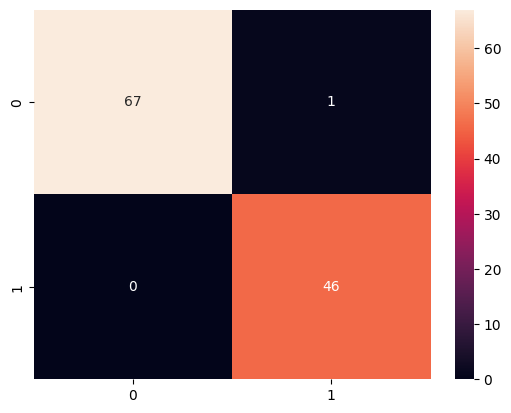

In [180]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)

**The model has predicted only mistake as shown in confusion matrix which is perfect**

# **Conclusion :**
>`SVC` is perfect for this dataset as it gives the highest accuracy `99.12 %`.
>>`Robust Scaler` is the best feature scaling technique for this dataset, as it has transformed test accuracy using `SVC` from  `92.98 %` to `99.12 %`.
>>> Model doesn't suffer from `Overfitting` as `Trainning Accuracy` is `98.24 %` and `Testing Accuracy` is `99.12 %`